# Victor Manuel Gómez Espinosa
## CIMAT Unidad Monterrey
### Estadísticas de Riesgos a la Alza y Baja de 2011-2020

In [ ]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [ ]:
#lee datos
df2=pd.read_excel('RiesgosLimpia.xlsx',na_values=['na','.']).dropna()
df2.head()

,trimestre,region,rama,riesgo,texto,TextsLen
0,1T11,CE,Agropecuario-Industria Alimentaria,Alza,"La empresa, ya que se dedica a hacer construcc...",36
1,1T11,CE,Agropecuario-Industria Alimentaria,Alza,El que los consumidores gocen de liquidez impu...,42
2,1T11,CE,Agropecuario-Industria Alimentaria,Alza,Se requiere incrementar el poder adquisitivo d...,31
3,1T11,CE,Comercio,Alza,Considera que una nueva ley fiscal podría prop...,16
4,1T11,CE,Agropecuario-Industria Alimentaria,Alza,"Demanda EUA, materias primas e inseguridad",7


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35895 entries, 0 to 35894
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   trimestre  35895 non-null  object
 1   region     35895 non-null  object
 2   rama       35895 non-null  object
 3   riesgo     35895 non-null  object
 4   texto      35895 non-null  object
 5   TextsLen   35895 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
df2.rama.value_counts()/len(df2)

Agropecuario-Industria Alimentaria    0.179914
Otros servicios                       0.173590
Comercio                              0.163338
Construcción e inmuebles              0.129154
Manufacturas                          0.112829
Transporte y Comunicaciones           0.078340
Minería, electricidad, gas y agua     0.065413
Servicios Financieros y Seguros       0.052041
Turismo                               0.034183
Minería, Electricidad, Gas y Agua     0.004374
Construcción e Inmuebles              0.004207
Actividad Económica en General        0.002619
Name: rama, dtype: float64

In [ ]:
df2.riesgo.value_counts()/len(df2)

Baja    0.552974
Alza    0.447026
Name: riesgo, dtype: float64

In [ ]:
spacy_es=spacy.load('es_core_news_sm') #instancia de spacy en español

In [ ]:
#funcion para tokenizar
def tokenize(text):
    return [tok.text for tok in spacy_es.tokenizer(text)]

In [ ]:
#obtiene el numero de tokens en los documentos
l_tokens=[]
textos=df2.texto.values
i=0
for texto in textos:
    tipo=type(texto)
    if tipo==type('str'):
        tokens=tokenize(texto) #tokeniza
        
    else: #si no es texto, imprime el contenido y la posicion y asigna una etiqueta de nan
        print(texto)
        print(i)
        tokens='nan'
    
    if tokens=='nan' or (len(tokens)<=1 and len(tokens[0])<=1):
        print(tokens)
    i+=1
    l_tokens.append(len(tokens)) #guarda el numero de tokens
l_tokens=np.array(l_tokens)
#df2['TextsLen']=l_tokens

# Estadísticas

## Textos

In [ ]:
df2.describe()

,TextsLen
count,35895.000000
mean,13.077170
std,8.684746
min,1.000000
25%,7.000000
50%,11.000000
75%,17.000000
max,54.000000


<AxesSubplot:>

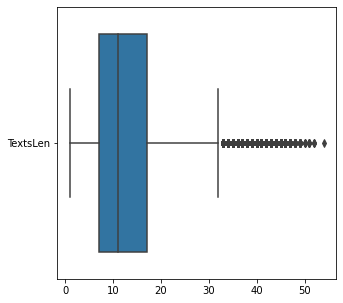

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=df2,orient="h") #boxplot horizontal

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


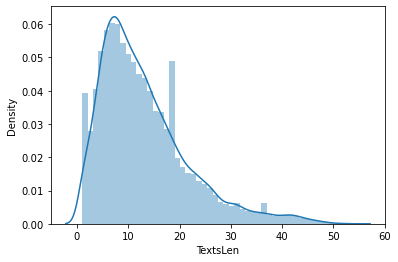

In [ ]:
sns.distplot(df2.TextsLen)
plt.show()

## Observaciones por trimestre

In [ ]:
df2.trimestre.value_counts()/len(df2)

3T20    0.041454
2T19    0.041454
4T19    0.041008
3T19    0.040786
4T16    0.040591
2T20    0.039811
1T20    0.039253
1T19    0.039253
2T18    0.035743
4T18    0.035242
3T18    0.034991
1T18    0.034322
4T17    0.033041
3T17    0.031704
2T17    0.031314
1T17    0.030812
4T15    0.023429
3T14    0.022761
2T15    0.022566
4T14    0.022232
3T16    0.022120
3T13    0.021702
3T15    0.021591
1T16    0.021507
1T15    0.021479
2T14    0.021451
2T16    0.020978
1T14    0.020532
1T11    0.018666
4T13    0.016883
4T11    0.012342
1T12    0.011952
4T12    0.011924
2T12    0.011812
3T11    0.011534
4T20    0.011506
1T13    0.011311
3T12    0.010698
2T13    0.010196
2T11    0.008051
Name: trimestre, dtype: float64

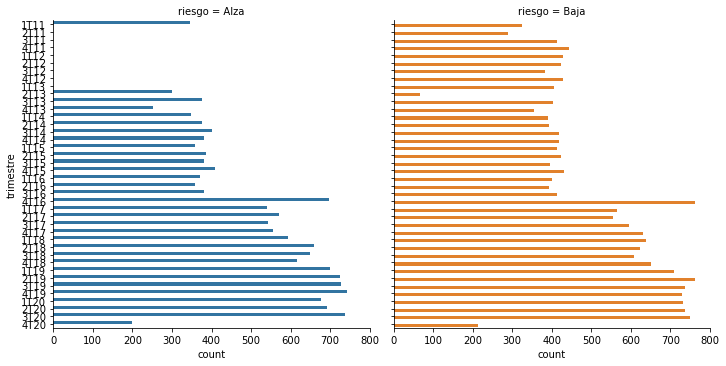

In [ ]:
sns.catplot(y='trimestre', col='riesgo',data=df2, kind='count',hue='riesgo')
plt.show()

## Observaciones por región

In [ ]:
reg=df2.region.value_counts()/len(df2)
reg

NO     0.315838
SUR    0.242318
CN     0.223624
CE     0.218220
Name: region, dtype: float64

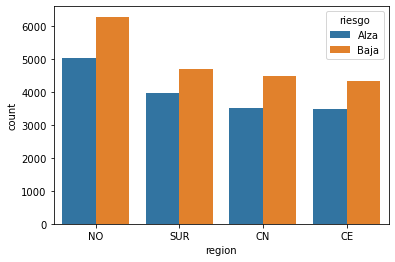

In [ ]:
sns.countplot(x='region',data=df2, order=df2.region.value_counts().index, hue='riesgo')
plt.show()

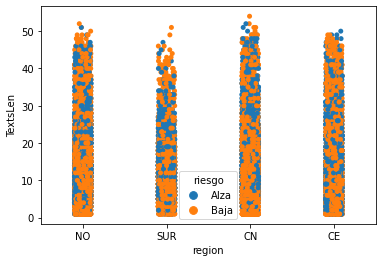

In [ ]:
sns.stripplot(x='region',y='TextsLen',order=df2.region.value_counts().index, data=df2,hue='riesgo')
plt.show()

## Observaciones por rama

In [ ]:
df2.rama.value_counts()/len(df2)

Agropecuario-Industria Alimentaria    0.179914
Otros servicios                       0.173590
Comercio                              0.163338
Construcción e inmuebles              0.129154
Manufacturas                          0.112829
Transporte y Comunicaciones           0.078340
Minería, electricidad, gas y agua     0.065413
Servicios Financieros y Seguros       0.052041
Turismo                               0.034183
Minería, Electricidad, Gas y Agua     0.004374
Construcción e Inmuebles              0.004207
Actividad Económica en General        0.002619
Name: rama, dtype: float64

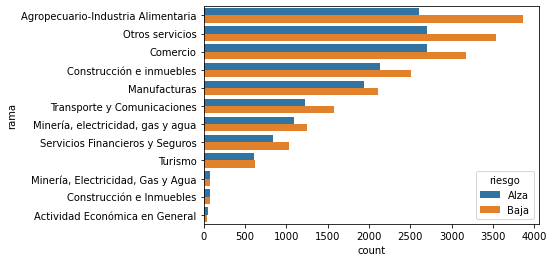

In [ ]:
sns.countplot(y='rama',data=df2,  order=df2.rama.value_counts().index,hue='riesgo')
plt.show()

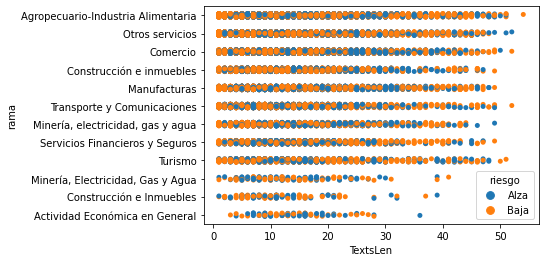

In [ ]:
sns.stripplot(x='TextsLen',y='rama',order=df2.rama.value_counts().index, data=df2,hue='riesgo')
plt.show()

## Observaciones por riesgo

In [ ]:
df2.riesgo.value_counts()/len(df2)

Baja    0.552974
Alza    0.447026
Name: riesgo, dtype: float64

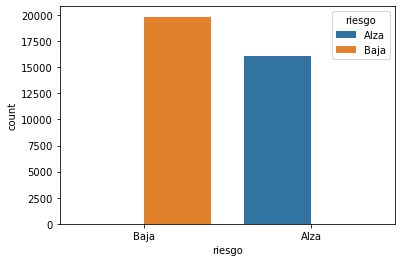

In [ ]:
sns.countplot(x='riesgo',data=df2,  order=df2.riesgo.value_counts().index,hue='riesgo')
plt.show()

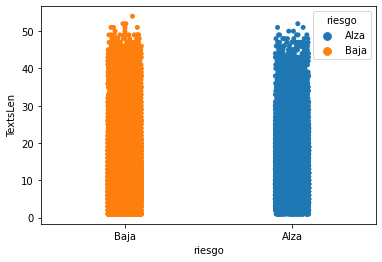

In [ ]:
sns.stripplot(x='riesgo',y='TextsLen',order=df2.riesgo.value_counts().index, data=df2,hue='riesgo')
plt.show()